# Image Compression with NMF

In this project I am going to attempt to compress an image through the Non-Negative Matrix Factorization method. Different numbers of dimensions will be used to see the improvement.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import math

%matplotlib inline

(-0.5, 2879.5, 3839.5, -0.5)

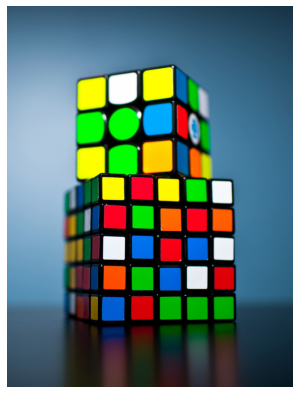

In [2]:
plt.figure(figsize=(20,7))
img = plt.imread('rubiks.jpg')
img = np.array(img, dtype=np.float64) / img.max()
plt.imshow(img)
plt.axis('off')

In [3]:
img.shape

(3840, 2880, 3)

In [4]:
img.dtype

dtype('float64')

Color distribution:

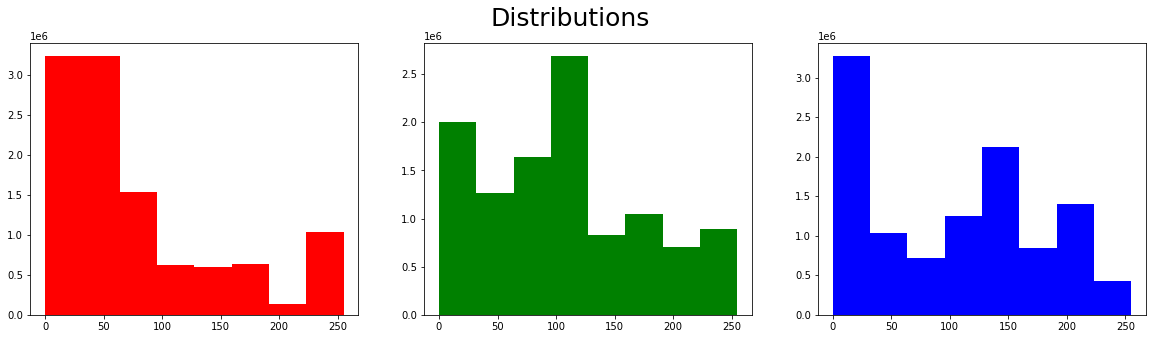

In [42]:
fig=plt.figure(figsize=(20, 5))
ax = []
colors=['r', 'g', 'b']
for i, subplot in zip(range(3), plots):
    temp = (255*img[:,:,i].ravel())
    ax.append(fig.add_subplot(1, 3, i+1))
    plt.hist(temp, facecolor=colors[i],bins=8)

fig.suptitle('Distributions', fontsize=25)
plt.show()

Each channel separately:

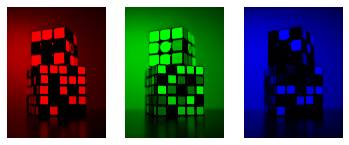

In [15]:
figure, plots = plt.subplots(ncols=3, nrows=1)
for i, subplot in zip(range(3), plots):
    temp = np.zeros(img.shape)
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

Let's construct a function to reduce the number of components.

In [93]:
def reduced_image(im, n_comp):
    new_img = im.copy()
    error_k=[]
    for i in range(im.shape[2]):
        nmf = NMF(n_components=n_comp, max_iter=200)
        W = nmf.fit_transform(im[:, :, i])
        H = nmf.components_
        new_img[:, : ,i] = np.clip(np.matmul(W,H), 0, 1)
        error_k.append(nmf.reconstruction_err_)
        
    error_avg = sum(error_k)/len(error_k)
    return {'new_image': new_img, 'error': error_avg}

Now let's plot it to see if it works.

In [28]:
def print_im(im, n):
    print('Number of components:', n)
    out = reduced_image(im, n)
    new_image = out['new_image']
    plt.figure(figsize=(8, 3))
    plt.imshow(new_image); plt.axis('off')
    plt.show()

Number of components: 2


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


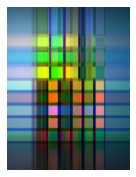

In [29]:
print_im(img,2)

Let's generalize the function to check for multiple n's.

In [95]:
def print_im(im, n_list):
    n_rows = math.ceil(len(n_list)/2)
    fig=plt.figure(figsize=(10,30))
    i=0
    ax = []
    global error_n
    error_n=[]
    for n in n_list:
        i=i+1
        out = reduced_image(im, n)
        new_image = out['new_image']
        error_n.append(out['error'])
        ax.append(fig.add_subplot(n_rows, 2, i))
        ax[-1].set_title("N-components: "+str(n), fontsize=20) 
        plt.imshow(new_image); plt.axis('off')
        print('%d finished'%n)    
    
    plt.show()

C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


1 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


2 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


5 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


10 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


20 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


50 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


75 finished


C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\EMILIO\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


100 finished


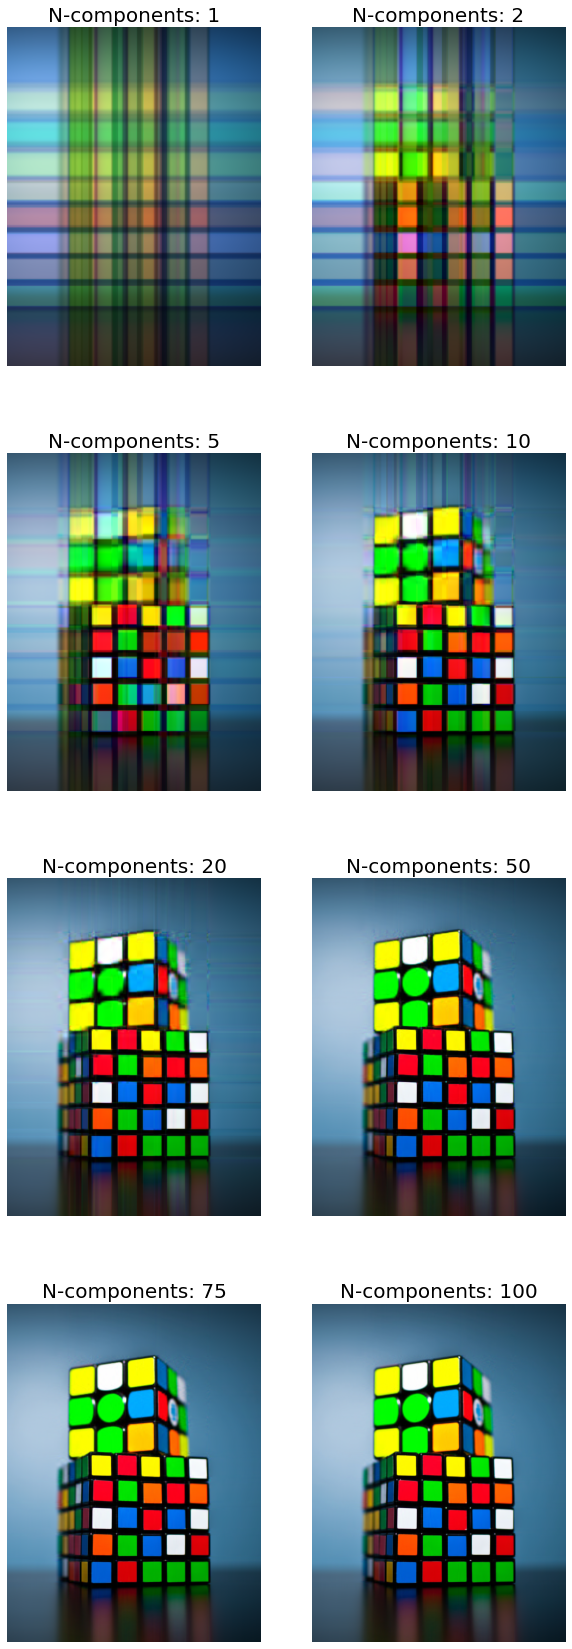

In [96]:
comp_array = [1, 2, 5, 10, 20, 50, 75, 100]
print_im(img, comp_array)

In [88]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

### Errors

In [108]:
dic = {'Num of Components':comp_array, 'Avg. Error':error_n}
error_df = pd.DataFrame(dic)
error_df

,Num of Components,Avg. Error
0,1,724.692749
1,2,598.786982
2,5,379.108525
3,10,214.237356
4,20,123.326383
5,50,61.553245
6,75,43.653959
7,100,33.267832
